<a href="https://colab.research.google.com/github/SuryaSurya1998/Movie-Recommendation-System/blob/main/movie_(jupyter).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [ ]:
movies=pd.read_csv('Downloads/movies1.csv')
#movie_link=pd.read_excel('movie_links.xlsx')
movi=pd.read_excel('Downloads/movi.xlsx')
ratings = pd.read_csv('Downloads/ratings1.csv')
tags=pd.read_csv('Downloads/tags1.csv')
links=pd.read_csv('Downloads/links.csv')

## Movie dataset

In [ ]:

movies.describe()

,movieId,year
count,9742.000000,9742.000000
mean,42200.353623,1994.634572
std,52160.494854,18.536172
min,1.000000,1902.000000
25%,3248.250000,1988.000000
50%,7300.000000,1999.000000
75%,76232.000000,2008.000000
max,193609.000000,2018.000000


In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 4 columns):
movieId       9742 non-null int64
movie_name    9742 non-null object
year          9742 non-null int64
genres        9742 non-null object
dtypes: int64(2), object(2)
memory usage: 304.5+ KB


In [ ]:
movies.shape

(9742, 4)

In [ ]:
movies.dtypes

movieId        int64
movie_name    object
year           int64
genres        object
dtype: object

In [ ]:
movies.columns

Index(['movieId', 'movie_name', 'year', 'genres'], dtype='object')

In [ ]:
movies.isnull().sum()

movieId       0
movie_name    0
year          0
genres        0
dtype: int64

In [ ]:
#links dataset
links.describe()

,movieId,imdbId,tmdbId
count,9742.000000,9.742000e+03,9734.000000
mean,42200.353623,6.771839e+05,55162.123793
std,52160.494854,1.107228e+06,93653.481487
min,1.000000,4.170000e+02,2.000000
25%,3248.250000,9.518075e+04,9665.500000
50%,7300.000000,1.672605e+05,16529.000000
75%,76232.000000,8.055685e+05,44205.750000
max,193609.000000,8.391976e+06,525662.000000


In [ ]:
links.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
movieId    9742 non-null int64
imdbId     9742 non-null int64
tmdbId     9734 non-null float64
dtypes: float64(1), int64(2)
memory usage: 228.4 KB


In [ ]:
links.columns

Index(['movieId', 'imdbId', 'tmdbId'], dtype='object')

In [ ]:
links.isnull().sum()

movieId    0
imdbId     0
tmdbId     8
dtype: int64

In [ ]:
#tags dataset

tags.describe()

,userId,movieId
count,3683.000000,3683.000000
mean,431.149335,27252.013576
std,158.472553,43490.558803
min,2.000000,1.000000
25%,424.000000,1262.500000
50%,474.000000,4454.000000
75%,477.000000,39263.000000
max,610.000000,193565.000000


In [ ]:
tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 5 columns):
userId     3683 non-null int64
movieId    3683 non-null int64
tag        3683 non-null object
date       3683 non-null object
time       3683 non-null object
dtypes: int64(2), object(3)
memory usage: 143.9+ KB


In [ ]:
tags.columns

Index(['userId', 'movieId', 'tag', 'date', 'time'], dtype='object')

In [ ]:
tags.isnull().sum()

userId     0
movieId    0
tag        0
date       0
time       0
dtype: int64

In [ ]:
#rating dataset

ratings.describe()

,userId,movieId,rating
count,100836.000000,100836.000000,100836.000000
mean,326.127564,19435.295718,3.501557
std,182.618491,35530.987199,1.042529
min,1.000000,1.000000,0.500000
25%,177.000000,1199.000000,3.000000
50%,325.000000,2991.000000,3.500000
75%,477.000000,8122.000000,4.000000
max,610.000000,193609.000000,5.000000


In [ ]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 5 columns):
userId     100836 non-null int64
movieId    100836 non-null int64
rating     100836 non-null float64
date       100836 non-null object
time       100836 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 3.8+ MB


In [ ]:
ratings.columns

Index(['userId', 'movieId', 'rating', 'date', 'time'], dtype='object')

In [ ]:
ratings.isnull().sum()

userId     0
movieId    0
rating     0
date       0
time       0
dtype: int64

## Merging movie dataset & ratings dataset

In [ ]:
movie_dataset=pd.merge(movies,ratings,on = 'movieId')
df=movie_dataset
df.head()

,movieId,movie_name,year,genres,userId,rating,date,time
0,1,Toy Story,1995,Adventure|Animation|Children|Comedy|Fantasy,1,4.0,7/30/2000,6:45 PM
1,1,Toy Story,1995,Adventure|Animation|Children|Comedy|Fantasy,5,4.0,11-08-1996,6:36 AM
2,1,Toy Story,1995,Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1/25/2005,6:52 AM
3,1,Toy Story,1995,Adventure|Animation|Children|Comedy|Fantasy,15,2.5,11/13/2017,12:59 PM
4,1,Toy Story,1995,Adventure|Animation|Children|Comedy|Fantasy,17,4.5,5/18/2011,5:28 AM


In [ ]:
g12=df.groupby(['movieId','movie_name','year','genres'],as_index=False)['rating'].mean()
g12.head()

,movieId,movie_name,year,genres,rating
0,1,Toy Story,1995,Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji,1995,Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men,1995,Comedy|Romance,3.259615
3,4,Waiting to Exhale,1995,Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II,1995,Comedy,3.071429


In [ ]:
m1 = g12['genres'].str.get_dummies('|')
m1.head()

,Action,Adventure,Animation,Biography,Children,Comedy,Crime,Documentary,Drama,Epic,...,IMAX,Musical,Mystery,Romance,Satire,Sci-Fi,Sports,Thriller,War,Western
0,0,1,1,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## m2 is the merged dataset of movies and ratings

In [ ]:

m2 = g12.join(g12.pop('genres').str.get_dummies('|'))
m2.head()

,movieId,movie_name,year,rating,Action,Adventure,Animation,Biography,Children,Comedy,...,IMAX,Musical,Mystery,Romance,Satire,Sci-Fi,Sports,Thriller,War,Western
0,1,Toy Story,1995,3.920930,0,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji,1995,3.431818,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men,1995,3.259615,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
3,4,Waiting to Exhale,1995,2.357143,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,5,Father of the Bride Part II,1995,3.071429,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
m2.to_csv("mov_rat.csv")

## Count of movies released in between the year 1902-2018

In [ ]:
g1=movies.groupby(['year'],as_index=False)['movie_name'].count()
g1

,year,movie_name
0,1902,1
1,1903,1
2,1908,1
3,1915,1
4,1916,4
5,1917,1
6,1919,1
7,1920,2
8,1921,1
9,1922,1


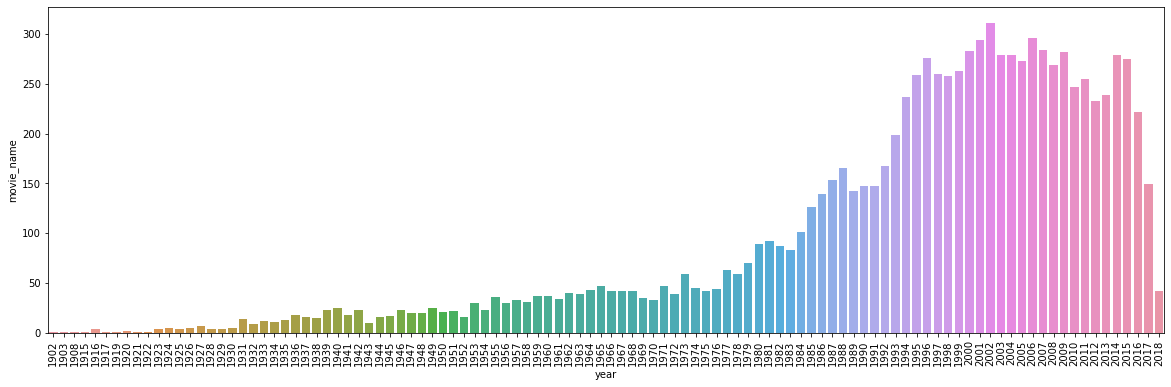

In [ ]:
#Barchart
plt.figure(figsize=(20,6))
plt.xticks(rotation=90)
sns.barplot(x='year',y='movie_name',data=g1,ci=None)

### The above graph shows the movie released in between 1902 to 2018

([<matplotlib.patches.Wedge at 0x143088fb198>,
 [Text(1.0999999428039282, 0.00035472715594767507, '1902'),
  Text(1.0999994852353876, 0.0010641813202866657, '1903'),
  Text(1.099998570098497, 0.0017736350419566393, '1908'),
  Text(1.099997197393637, 0.002483088025845122, '1915'),
  Text(1.0999917637758363, 0.0042567153210998025, '1916'),
  Text(1.0999834703764422, 0.006030331549656964, '1917'),
  Text(1.0999793522824184, 0.00673977390952034, '1919'),
  Text(1.0999723172170162, 0.00780393210043204, '1920'),
  Text(1.0999642526482982, 0.008868082987365408, '1921'),
  Text(1.0999583043265544, 0.009577512362381226, '1922'),
  Text(1.0999414317414877, 0.01135106772451346, '1923'),
  Text(1.0999038548037265, 0.0145433898353595, '1924'),
  Text(1.099857012919031, 0.017735589441193415, '1925'),
  Text(1.09980090648197, 0.020927639652792276, '1926'),
  Text(1.0997116872014128, 0.02518342773774289, '1927'),
  Text(1.0996154360273127, 0.029084237147692267, '1928'),
  Text(1.0995367443425446, 0.03

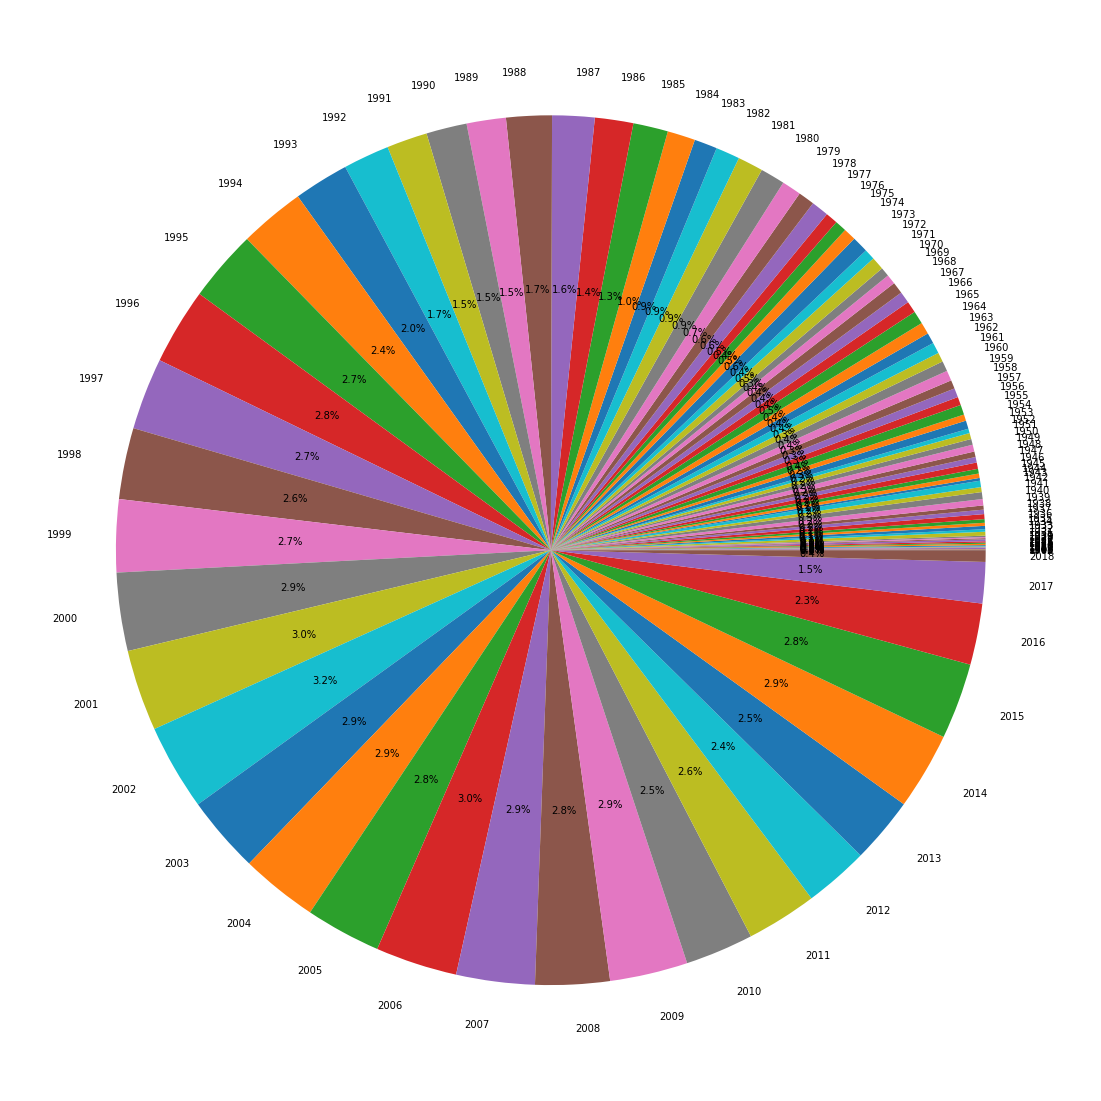

In [ ]:
#pie chart
plt.figure(figsize=(25,20))
plt.pie(g1['movie_name'],labels=g1['year'],autopct='%0.1f%%')

# count of all genres

In [ ]:
genres=movies['genres'].str.get_dummies('|').sum()
genres.sort_values()

Sports            1
Satire            1
Biography         1
Epic              1
Film-Noir        87
IMAX            158
Western         167
Musical         341
War             382
Documentary     444
Mystery         577
Animation       612
Children        664
Fantasy         783
Horror          979
Sci-Fi          985
Crime          1202
Adventure      1265
Romance        1600
Action         1832
Thriller       1897
Comedy         3767
Drama          4370
dtype: int64

### In Drama , Comedy high number of movies are released

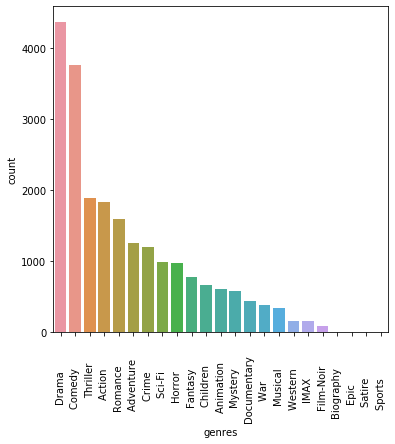

In [ ]:
#bar chart for the count for genres

plt.figure(figsize=(6,6))
plt.xticks(rotation=90)
sns.barplot(x='genres',y='count',data=movi,ci=None)

# Finding the avarege ratings for each and every genres

In [ ]:

 
Action=m2.groupby(['Action'],as_index=False)['rating'].mean()
print(Action)
Adventure=m2.groupby(['Adventure'],as_index=False)['rating'].mean()
print(Adventure)
Animation=m2.groupby(['Animation'],as_index=False)['rating'].mean()
print(Animation)
Biography=m2.groupby(['Biography'],as_index=False)['rating'].mean()
print(Biography)
Children=m2.groupby(['Children'],as_index=False)['rating'].mean()
print(Children)
Comedy=m2.groupby(['Comedy'],as_index=False)['rating'].mean()
print(Comedy)
Crime=m2.groupby(['Crime'],as_index=False)['rating'].mean()
print(Crime)
Documentary=m2.groupby(['Documentary'],as_index=False)['rating'].mean()
print(Documentary)
Drama=m2.groupby(['Drama'],as_index=False)['rating'].mean()
print(Drama)
Epic=m2.groupby(['Epic'],as_index=False)['rating'].mean()
print(Epic)
Fantasy=m2.groupby(['Fantasy'],as_index=False)['rating'].mean()
print(Fantasy)
Film_Noir=m2.groupby(['Film-Noir'],as_index=False)['rating'].mean()
print(Film_Noir)
Horror=m2.groupby(['Horror'],as_index=False)['rating'].mean()
print(Horror)
IMAX=m2.groupby(['IMAX'],as_index=False)['rating'].mean()
print(IMAX)
Musical=m2.groupby(['Musical'],as_index=False)['rating'].mean()
print(Musical)
Mystery=m2.groupby(['Mystery'],as_index=False)['rating'].mean()
print(Mystery)
Romance=m2.groupby(['Romance'],as_index=False)['rating'].mean()
print(Romance)
Satire=m2.groupby(['Satire'],as_index=False)['rating'].mean()
print(Satire)
Sci_Fi=m2.groupby(['Sci-Fi'],as_index=False)['rating'].mean()
print(Sci_Fi)
Sports=m2.groupby(['Sports'],as_index=False)['rating'].mean()
print(Sports)
Thriller=m2.groupby(['Thriller'],as_index=False)['rating'].mean()
print(Thriller)
War=m2.groupby(['War'],as_index=False)['rating'].mean()
print(War)
Western=m2.groupby(['Western'],as_index=False)['rating'].mean()
print(Western)

   Action    rating
0       0  3.301700
1       1  3.093356
   Adventure    rating
0          0  3.269757
1          1  3.213533
   Animation    rating
0          0  3.246659
1          1  3.497942
   Biography    rating
0          0  3.262527
1          1  2.500000
   Children   rating
0         0  3.27379
1         1  3.10769
   Comedy    rating
0       0  3.313721
1       1  3.181261
   Crime    rating
0      0  3.256398
1      1  3.305467
   Documentary    rating
0            0  3.237737
1            1  3.781395
   Drama    rating
0      0  3.133718
1      1  3.420954
   Epic    rating
0     0  3.262732
1     1  0.500000
   Fantasy    rating
0        0  3.265936
1        1  3.222565
   Film-Noir    rating
0          0  3.258850
1          1  3.670471
   Horror    rating
0       0  3.300810
1       1  2.919388
   IMAX    rating
0     0  3.261630
1     1  3.311996
   Musical    rating
0        0  3.261378
1        1  3.291985
   Mystery    rating
0        0  3.257598
1        1  3.33

## Finally we got the average rating for every genres
## then i mannualy noted and created it in .xlsx dataset

In [ ]:
genres_ratings=pd.read_excel('Downloads/ratings_genres.xlsx')
genres_ratings

,genres,rating
0,Satire,5.000000
1,Documentary,3.781390
2,Film-Noir,3.670470
3,War,3.571650
4,Sports,3.500000
5,Animation,3.497940
6,Drama,3.420950
7,Western,3.383390
8,Romance,3.362390
9,Mystery,3.339340


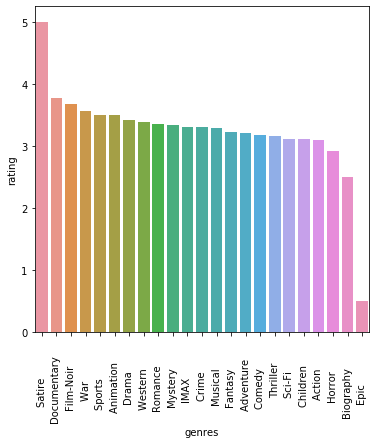

In [ ]:
plt.figure(figsize=(6,6))
plt.xticks(rotation=90)
sns.barplot(x='genres',y='rating',data=genres_ratings,ci=None)

# calculating the number of movies released based on genres

In [ ]:

years_count = m2.groupby(['year'],as_index=False)['Action', 'Adventure','Animation', 'Biography', 'Children', 'Comedy', 'Crime', 'Documentary','Drama', 'Epic', 'Fantasy', 'Film-Noir', 'Horror', 'IMAX', 'Musical','Mystery', 'Romance', 'Satire', 'Sci-Fi', 'Sports', 'Thriller', 'War','Western'].sum().T
years_count

,0,1,2,3,4,5,6,7,8,9,...,96,97,98,99,100,101,102,103,104,105
year,1902,1903,1908,1915,1916,1917,1919,1920,1921,1922,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Action,1,0,0,0,1,0,0,0,0,0,...,59,65,55,56,61,62,64,49,39,17
Adventure,1,0,0,0,1,0,0,0,0,0,...,37,30,40,31,39,35,45,37,25,12
Animation,0,0,1,0,0,0,0,0,0,0,...,32,18,26,25,26,15,19,22,18,3
Biography,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
Children,0,0,0,0,0,0,0,0,0,0,...,17,17,19,10,8,15,14,13,9,3
Comedy,0,0,1,0,1,1,1,1,1,0,...,111,97,100,103,90,116,106,79,58,17
Crime,0,1,0,0,0,0,0,1,0,0,...,39,23,26,32,35,38,30,15,13,6
Documentary,0,0,0,0,0,0,0,0,0,0,...,12,17,22,11,8,18,19,13,13,2
Drama,0,0,0,1,1,0,1,0,1,0,...,131,102,110,92,99,117,102,74,45,9


# importing genres years count 

In [ ]:
count1 = pd.read_excel('Downloads/genres_count_years.xlsx')

Text(0.5, 1.0, '2002')

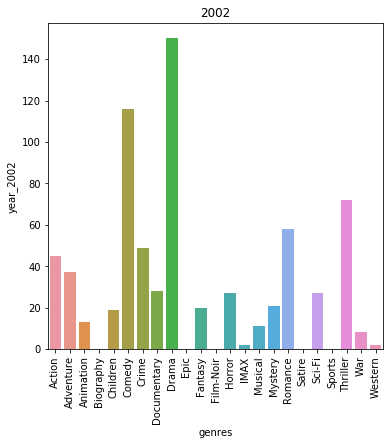

In [ ]:
#ploting graph for 2018
plt.figure(figsize=(6,6))
plt.xticks(rotation=90)
sns.barplot(x='genres',y='year_2002',data=count1,ci=None)
plt.title('2002')

([<matplotlib.patches.Wedge at 0x207eec2ad30>,
 [Text(1.0779578756493629, 0.2191045830773809, 'Action'),
  Text(0.9284979757825025, 0.5898232862203692, 'Adventure'),
  Text(0.7752135621878423, 0.7804126684005307, 'Animation'),
  Text(0.7287290760697577, 0.8239866101403088, 'Biography'),
  Text(0.6564375059625169, 0.8826606373718672, 'Children'),
  Text(0.04165513389203867, 1.0992110124177417, 'Comedy'),
  Text(-0.7064403496075744, 0.8431737854359137, 'Crime'),
  Text(-0.9489303581037455, 0.5563552601253067, 'Documentary'),
  Text(-1.0622005787760136, -0.28588447045598997, 'Drama'),
  Text(-0.656437480137313, -0.8826606565781525, 'Epic'),
  Text(-0.5752707442771161, -0.9375839006610839, 'Fantasy'),
  Text(-0.48953768908000805, -0.9850648968317801, 'Film-Noir'),
  Text(-0.3677650450259133, -1.0367009557519893, 'Horror'),
  Text(-0.23109959740090344, -1.0754501271937906, 'IMAX'),
  Text(-0.16844586281207927, -1.0870262146339869, 'Musical'),
  Text(-0.01225415659845917, -1.0999317413576448

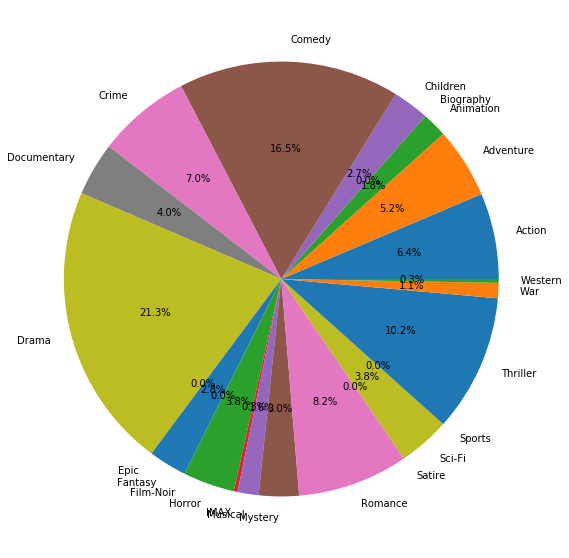

In [ ]:
#pie chart for 2018
plt.figure(figsize=(10,10))
plt.pie(count1['year_2002'],labels=count1['genres'],autopct='%0.1f%%')

## Comparing the top 9  years movie released counts

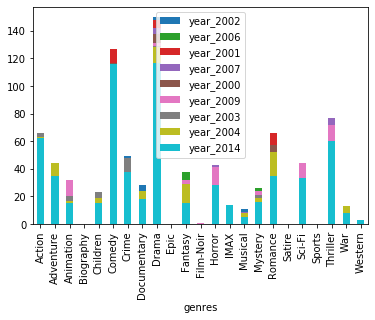

In [ ]:
ax = count1.plot(x="genres", y="year_2002", kind="bar")
count1.plot(x="genres", y="year_2006", kind="bar", ax=ax, color="C2")
count1.plot(x="genres", y="year_2001", kind="bar", ax=ax, color="C3")
count1.plot(x="genres", y="year_2007", kind="bar", ax=ax, color="C4")
count1.plot(x="genres", y="year_2000", kind="bar", ax=ax, color="C5")
count1.plot(x="genres", y="year_2009", kind="bar", ax=ax, color="C6")
count1.plot(x="genres", y="year_2003", kind="bar", ax=ax, color="C7")
count1.plot(x="genres", y="year_2004", kind="bar", ax=ax, color="C8")
count1.plot(x="genres", y="year_2014", kind="bar", ax=ax, color="C9")

plt.show()

#  find the rating wise

In [ ]:
# ratings with < 1
h1 = g12[g12.rating <= 1]

In [ ]:
h11 = h1['genres'].str.get_dummies('|').sum().reset_index()

In [ ]:
h11=pd.read_excel('Downloads/h11.xlsx')

Text(0.5, 1.0, 'rating <= 1')

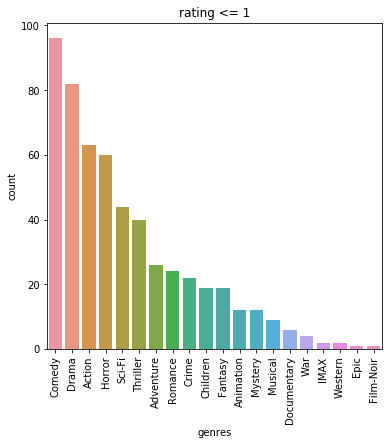

In [ ]:
plt.figure(figsize=(6,6))
plt.xticks(rotation=90)
sns.barplot(x='genres',y='count',data=h11,ci=None)
plt.title('rating <= 1')

Text(0.5, 1.0, 'rating <= 1')

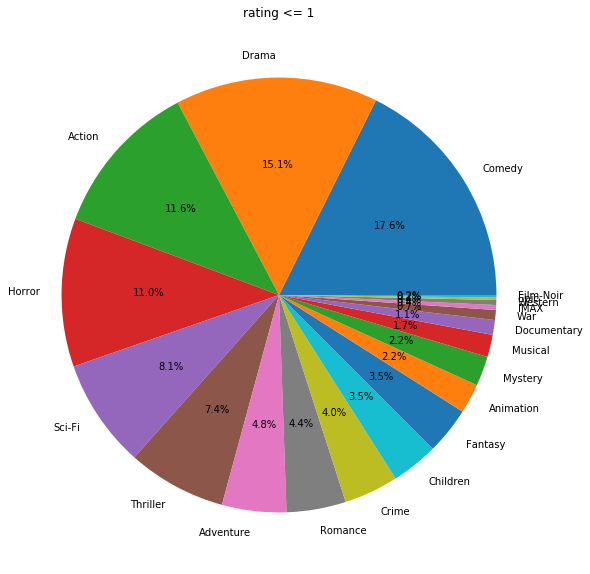

In [ ]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
plt.pie(h11['count'],labels=h11['genres'],autopct='%0.1f%%')
plt.title('rating <= 1')

In [ ]:
# rating 1 to 2
h2 = g12[g12.rating <= 2]

In [ ]:
h2 = h2[h2.rating > 1]

In [ ]:
h22 = h2['genres'].str.get_dummies('|').sum().reset_index()

In [ ]:
h22=pd.read_excel('Downloads/h22.xlsx')

Text(0.5, 1.0, 'rating 1 to 2')

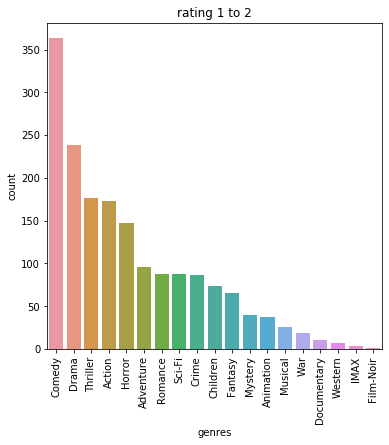

In [ ]:
plt.figure(figsize=(6,6))
plt.xticks(rotation=90)
sns.barplot(x='genres',y='count',data=h22,ci=None)
plt.title('rating 1 to 2')

Text(0.5, 1.0, 'rating 1 to 2')

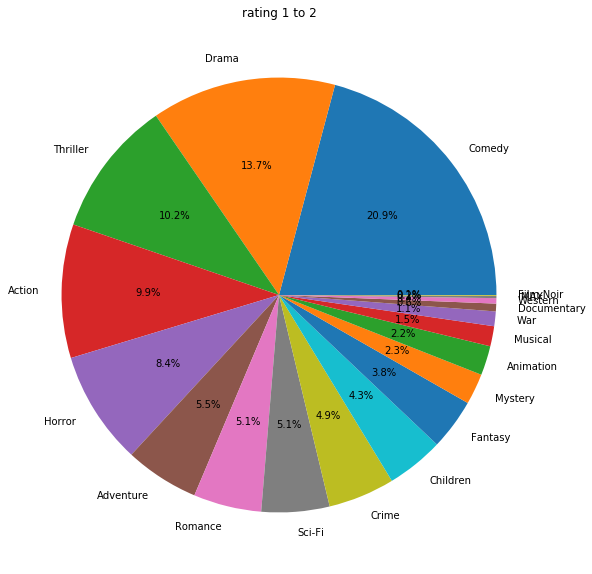

In [ ]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
plt.pie(h22['count'],labels=h22['genres'],autopct='%0.1f%%')
plt.title('rating 1 to 2')

In [ ]:
# ratings with 2 to 3
h3 = g12[g12.rating <= 3]

In [ ]:
h33 = h3[h3.rating > 2]

In [ ]:
h33 = h33['genres'].str.get_dummies('|').sum().reset_index()

In [ ]:
h33=pd.read_excel('Downloads/h33.xlsx')

Text(0.5, 1.0, 'rating 2 to 3')

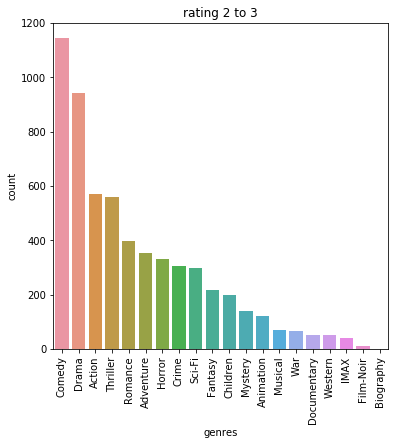

In [ ]:
plt.figure(figsize=(6,6))
plt.xticks(rotation=90)
sns.barplot(x='genres',y='count',data=h33,ci=None)
plt.title('rating 2 to 3')

Text(0.5, 1.0, 'rating 2 to 3')

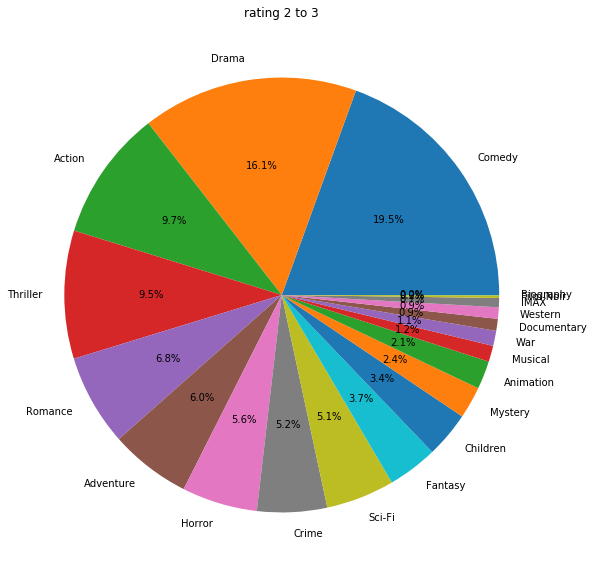

In [ ]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
plt.pie(h33['count'],labels=h33['genres'],autopct='%0.1f%%')
plt.title('rating 2 to 3')

In [ ]:
# ratings with 3 to 4
h4 = g12[g12.rating <= 4]

In [ ]:
h44 = h4[h4.rating > 3]

In [ ]:
h44 = h44['genres'].str.get_dummies('|').sum().reset_index()

In [ ]:
h44=pd.read_excel('Downloads/h44.xlsx')

Text(0.5, 1.0, 'rating 3 to 4')

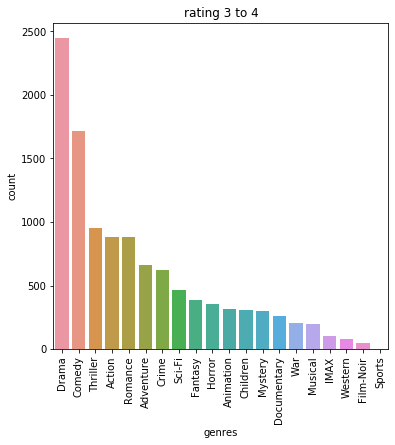

In [ ]:
plt.figure(figsize=(6,6))
plt.xticks(rotation=90)
sns.barplot(x='genres',y='count',data=h44,ci=None)
plt.title('rating 3 to 4')

Text(0.5, 1.0, 'rating 3 to 4')

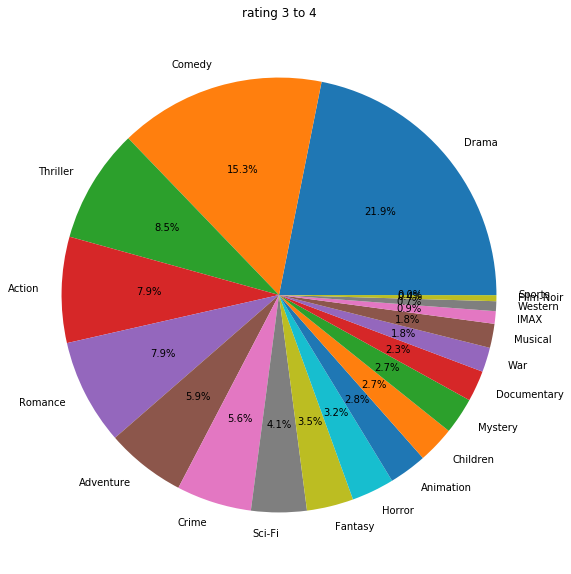

In [ ]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
plt.pie(h44['count'],labels=h44['genres'],autopct='%0.1f%%')
plt.title('rating 3 to 4')

In [ ]:
# rating with 4 to 5
h5 = g12[g12.rating <= 5]

In [ ]:
h55 = h5[h5.rating > 4]

In [ ]:
h55 = h55['genres'].str.get_dummies('|').sum().reset_index()

In [ ]:
h55=pd.read_excel('Downloads/h55.xlsx')

Text(0.5, 1.0, 'rating 4 to 5')

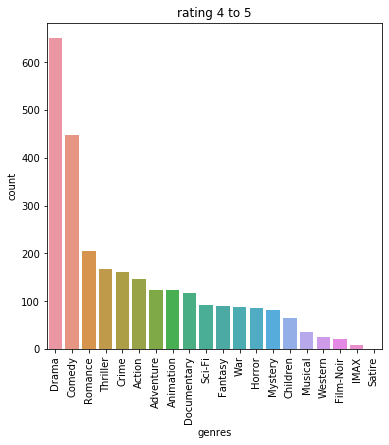

In [ ]:
plt.figure(figsize=(6,6))
plt.xticks(rotation=90)
sns.barplot(x='genres',y='count',data=h55,ci=None)
plt.title('rating 4 to 5')

Text(0.5, 1.0, 'rating 4 to 5')

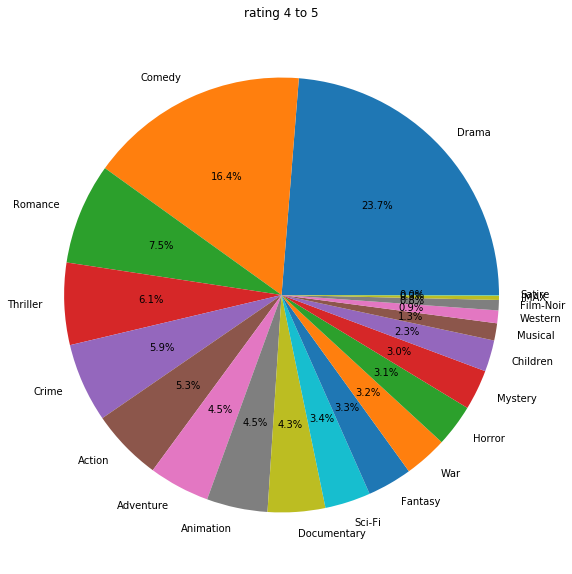

In [ ]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
plt.pie(h55['count'],labels=h55['genres'],autopct='%0.1f%%')
plt.title('rating 4 to 5')

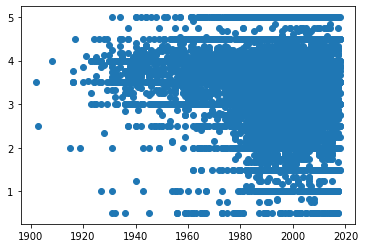

In [ ]:
#ploting the scatter graph to overall movies with ratings
plt.scatter(x=m2['year'], y=m2['rating'])
plt.show()

# movie rated counting

In [ ]:

movieId_count = df.groupby(['movieId']).count()

In [ ]:
movieId_count = movieId_count.drop(['rating','date','time','year','genres','userId'],axis=1)

In [ ]:
movieId_count

,movie_name
movieId,
1,215
2,110
3,52
4,7
5,49
6,102
7,54
8,8
9,16


In [ ]:
# counting the unique userId with count
userId_count = ratings.groupby(['userId']).count()

In [ ]:
userId_count = userId_count.drop(['rating','date','time'],axis=1)
userId_count

,movieId
userId,
1,232
2,29
3,39
4,216
5,44
6,314
7,152
8,47
9,46


In [ ]:
# getting the userId 1 ratted details
u1=df.loc[df['userId']==1]

In [ ]:
# in userId 1 ratings with above 3
u1 = u1.loc[u1['rating'] >= 3]

In [ ]:
u1 = u1['genres'].str.get_dummies('|').sum().reset_index()

In [ ]:
userId_1=pd.read_excel('Downloads/userId_1.xlsx')
userId_1

,genres,count
0,Action,89
1,Adventure,84
2,Comedy,81
3,Drama,67
4,Thriller,51
5,Fantasy,45
6,Crime,43
7,Children,42
8,Sci-Fi,40
9,Animation,29


([<matplotlib.patches.Wedge at 0x207eeb78630>,
 [Text(1.0077812114700266, 0.4408821042047474, 'Action'),
  Text(0.38419348417566457, 1.0307256505573943, 'Adventure'),
  Text(-0.4362077212490259, 1.009813261906741, 'Comedy'),
  Text(-0.9770812488367212, 0.5052843092474508, 'Drama'),
  Text(-1.0973441038678868, -0.0763931784021625, 'Thriller'),
  Text(-0.9576839293080857, -0.5411483082714255, 'Fantasy'),
  Text(-0.6645717133548478, -0.876552587018373, 'Crime'),
  Text(-0.2773091444034652, -1.0644715301172776, 'Children'),
  Text(0.13725975250028102, -1.0914026572917814, 'Sci-Fi'),
  Text(0.4733322040764614, -0.992953485609532, 'Animation'),
  Text(0.7083670632323901, -0.8415557638846752, 'Romance'),
  Text(0.8765525947960849, -0.6645717030962505, 'Musical'),
  Text(0.992953518846949, -0.4733321343511994, 'War'),
  Text(1.0605139782589583, -0.29207893097133536, 'Mystery'),
  Text(1.0900838012201732, -0.147367928388024, 'Horror'),
  Text(1.0990436334220546, -0.04585947922130023, 'Western')

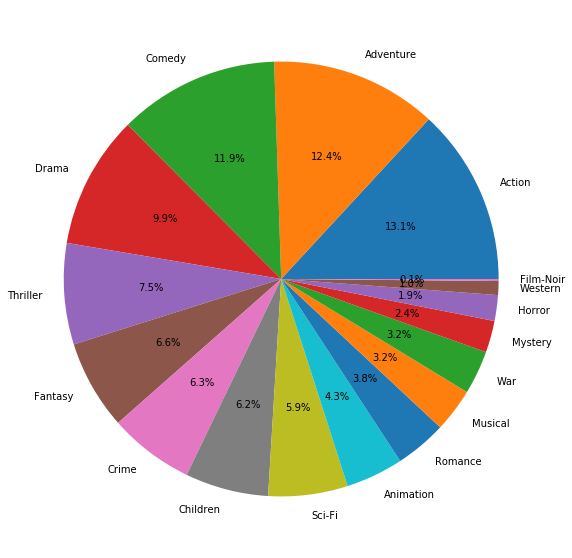

In [ ]:
plt.figure(figsize=(10,10))
plt.pie(userId_1['count'],labels=userId_1['genres'],autopct='%0.1f%%')

Text(0.5, 1.0, 'userId_1_behaviour')

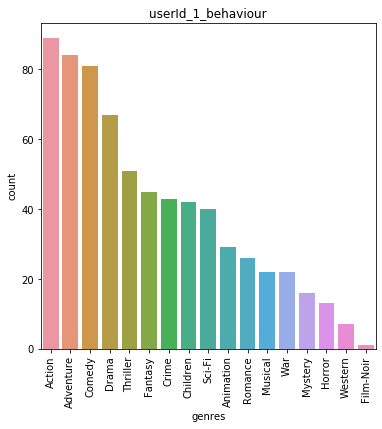

In [ ]:
plt.figure(figsize=(6,6))
plt.xticks(rotation=90)
sns.barplot(x='genres',y='count',data=userId_1,ci=None)
plt.title('userId_1_behaviour')

#### The above graph shows Drama ,Comedy ,Thriller ,Romance genres movies are the highly liked by the public 

## Giving Rank to all individual movies 

In [ ]:
#importing the movie_rated_count dataset
movie_rated_count = pd.read_excel('Downloads/movie_rated_count.xlsx')
movie_rated_count

,movieId,year,movie_rated_count,rating,genres
0,1.0,1995,215.0,3.920930,Adventure|Animation|Children|Comedy|Fantasy
1,2.0,1995,110.0,3.431818,Adventure|Children|Fantasy
2,3.0,1995,52.0,3.259615,Comedy|Romance
3,4.0,1995,7.0,2.357143,Comedy|Drama|Romance
4,5.0,1995,49.0,3.071429,Comedy
5,6.0,1995,102.0,3.946078,Action|Crime|Thriller
6,7.0,1995,54.0,3.185185,Comedy|Romance
7,8.0,1995,8.0,2.875000,Adventure|Children
8,9.0,1995,16.0,3.125000,Action
9,10.0,1995,132.0,3.496212,Action|Adventure|Thriller


In [ ]:
#taking log for movie_rated_count
movie_rated_count['log_value'] = np.log(movie_rated_count['movie_rated_count']+1)
movie_rated_count

C:\Users\SURYA\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


,movieId,year,movie_rated_count,rating,genres,log_value
0,1.0,1995,215.0,3.920930,Adventure|Animation|Children|Comedy|Fantasy,5.375278
1,2.0,1995,110.0,3.431818,Adventure|Children|Fantasy,4.709530
2,3.0,1995,52.0,3.259615,Comedy|Romance,3.970292
3,4.0,1995,7.0,2.357143,Comedy|Drama|Romance,2.079442
4,5.0,1995,49.0,3.071429,Comedy,3.912023
5,6.0,1995,102.0,3.946078,Action|Crime|Thriller,4.634729
6,7.0,1995,54.0,3.185185,Comedy|Romance,4.007333
7,8.0,1995,8.0,2.875000,Adventure|Children,2.197225
8,9.0,1995,16.0,3.125000,Action,2.833213
9,10.0,1995,132.0,3.496212,Action|Adventure|Thriller,4.890349


In [ ]:
# Creating the rate to find the rank
movie_rated_count['Rate'] = movie_rated_count.rating * movie_rated_count.log_value
movie_rated_count

,movieId,year,movie_rated_count,rating,genres,log_value,Rate
0,1.0,1995,215.0,3.920930,Adventure|Animation|Children|Comedy|Fantasy,5.375278,21.076092
1,2.0,1995,110.0,3.431818,Adventure|Children|Fantasy,4.709530,16.162251
2,3.0,1995,52.0,3.259615,Comedy|Romance,3.970292,12.941625
3,4.0,1995,7.0,2.357143,Comedy|Drama|Romance,2.079442,4.901541
4,5.0,1995,49.0,3.071429,Comedy,3.912023,12.015499
5,6.0,1995,102.0,3.946078,Action|Crime|Thriller,4.634729,18.289004
6,7.0,1995,54.0,3.185185,Comedy|Romance,4.007333,12.764098
7,8.0,1995,8.0,2.875000,Adventure|Children,2.197225,6.317021
8,9.0,1995,16.0,3.125000,Action,2.833213,8.853792
9,10.0,1995,132.0,3.496212,Action|Adventure|Thriller,4.890349,17.097698


In [ ]:
# Giving rank to movies
movie_rated_count['Rank'] = movie_rated_count['Rate'].rank(ascending=0)
movie_rated_count

,movieId,year,movie_rated_count,rating,genres,log_value,Rate,Rank
0,1.0,1995,215.0,3.920930,Adventure|Animation|Children|Comedy|Fantasy,5.375278,21.076092,24.0
1,2.0,1995,110.0,3.431818,Adventure|Children|Fantasy,4.709530,16.162251,225.0
2,3.0,1995,52.0,3.259615,Comedy|Romance,3.970292,12.941625,660.0
3,4.0,1995,7.0,2.357143,Comedy|Drama|Romance,2.079442,4.901541,4111.5
4,5.0,1995,49.0,3.071429,Comedy,3.912023,12.015499,876.0
5,6.0,1995,102.0,3.946078,Action|Crime|Thriller,4.634729,18.289004,91.0
6,7.0,1995,54.0,3.185185,Comedy|Romance,4.007333,12.764098,692.0
7,8.0,1995,8.0,2.875000,Adventure|Children,2.197225,6.317021,3063.0
8,9.0,1995,16.0,3.125000,Action,2.833213,8.853792,1797.0
9,10.0,1995,132.0,3.496212,Action|Adventure|Thriller,4.890349,17.097698,153.0


### Giving Rank to Genres

In [ ]:
#importing the Genres_count_rating
genres_counts_rating = pd.read_csv('Downloads/genres_counts_rating.csv')
genres_counts_rating

,genres,count,rating
0,Action,1832,3.093360
1,Adventure,1265,3.213530
2,Animation,612,3.497940
3,Biography,1,2.500000
4,Children,664,3.107690
5,Comedy,3767,3.181260
6,Crime,1202,3.305470
7,Documentary,444,3.781390
8,Drama,4370,3.420950
9,Epic,1,0.500000


In [ ]:
#taking log for movie_rated_count
genres_counts_rating['log_value'] = np.log(genres_counts_rating['count']+1)
genres_counts_rating

,genres,count,rating,log_value
0,Action,1832,3.093360,7.513709
1,Adventure,1265,3.213530,7.143618
2,Animation,612,3.497940,6.418365
3,Biography,1,2.500000,0.693147
4,Children,664,3.107690,6.499787
5,Comedy,3767,3.181260,8.234300
6,Crime,1202,3.305470,7.092574
7,Documentary,444,3.781390,6.098074
8,Drama,4370,3.420950,8.382747
9,Epic,1,0.500000,0.693147


In [ ]:
# Creating the rate to find the rank
genres_counts_rating['Rate'] = genres_counts_rating.rating * genres_counts_rating.log_value
genres_counts_rating

,genres,count,rating,log_value,Rate
0,Action,1832,3.093360,7.513709,23.242608
1,Adventure,1265,3.213530,7.143618,22.956229
2,Animation,612,3.497940,6.418365,22.451055
3,Biography,1,2.500000,0.693147,1.732868
4,Children,664,3.107690,6.499787,20.199323
5,Comedy,3767,3.181260,8.234300,26.195448
6,Crime,1202,3.305470,7.092574,23.444290
7,Documentary,444,3.781390,6.098074,23.059197
8,Drama,4370,3.420950,8.382747,28.676959
9,Epic,1,0.500000,0.693147,0.346574


In [ ]:
# Giving rank to genres 
genres_counts_rating['Rank'] = genres_counts_rating['Rate'].rank(ascending=0)
genres_counts_rating

,genres,count,rating,log_value,Rate,Rank
0,Action,1832,3.093360,7.513709,23.242608,6.0
1,Adventure,1265,3.213530,7.143618,22.956229,8.0
2,Animation,612,3.497940,6.418365,22.451055,9.0
3,Biography,1,2.500000,0.693147,1.732868,22.0
4,Children,664,3.107690,6.499787,20.199323,14.0
5,Comedy,3767,3.181260,8.234300,26.195448,2.0
6,Crime,1202,3.305470,7.092574,23.444290,5.0
7,Documentary,444,3.781390,6.098074,23.059197,7.0
8,Drama,4370,3.420950,8.382747,28.676959,1.0
9,Epic,1,0.500000,0.693147,0.346574,23.0


In [ ]:
# getting top 5000 ranking movies 
rank_5000=movie_rated_count.loc[movie_rated_count['Rank'] <= 5000]

In [ ]:
rank_5000 = rank_5000['genres'].str.get_dummies('|').sum().reset_index()

In [ ]:
rank_5000=pd.read_excel('Downloads/rank_5000.xlsx')

Text(0.5, 1.0, 'top 5000 ranking movies')

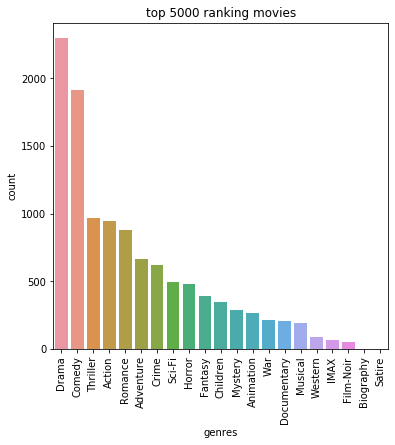

In [ ]:
# barplot for top 100 ranking movies
plt.figure(figsize=(6,6))
plt.xticks(rotation=90)
sns.barplot(x='genres',y='count',data=rank_5000,ci=None)
plt.title('top 5000 ranking movies')

([<matplotlib.patches.Wedge at 0x216d6844908>,
 [Text(0.8865861288884821, 0.6511259755704236, 'Drama'),
  Text(-0.24384229615309386, 1.0726327118854744, 'Comedy'),
  Text(-0.9367875353713147, 0.5765666601295449, 'Thriller'),
  Text(-1.0997041011106687, 0.02551254594070118, 'Action'),
  Text(-0.9754526756391648, -0.5084211616252754, 'Romance'),
  Text(-0.6773924564888192, -0.8666830215782719, 'Adventure'),
  Text(-0.33407795918796845, -1.0480419443823812, 'Crime'),
  Text(-0.0007593152802305851, -1.0999997379273803, 'Sci-Fi'),
  Text(0.29127254200957015, -1.0607357381889626, 'Horror'),
  Text(0.5358229374521996, -0.9606736072673675, 'Fantasy'),
  Text(0.7193864107261119, -0.8321557498825578, 'Children'),
  Text(0.8531407601054141, -0.6943708256016784, 'Mystery'),
  Text(0.9485265660577032, -0.5570434035896858, 'Animation'),
  Text(1.013941953995355, -0.4265228175937155, 'War'),
  Text(1.0567398784854183, -0.30545184435295786, 'Documentary'),
  Text(1.083970119645136, -0.1871063326467327

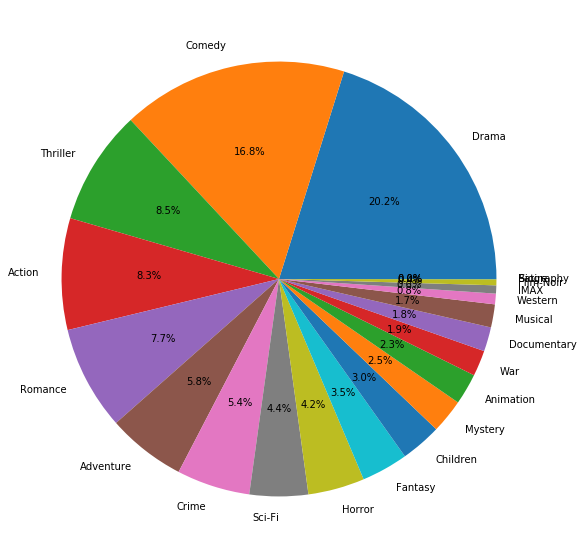

In [ ]:
# pieplot for top 100 ranking movies
plt.figure(figsize=(10,10))
plt.pie(rank_5000['count'],labels=rank_5000['genres'],autopct='%0.1f%%')

In [ ]:
#Finding the trand
k2017 = movie_rated_count.loc[movie_rated_count['year']==2017]
k2017.head(10)

,movieId,year,movie_rated_count,rating,genres,log_value,Rate,Rank
8687,123947.0,2017,2.0,2.750000,Action|Comedy|Adventure|Fantasy,1.098612,3.021184,6332.0
8688,124273.0,2017,1.0,4.500000,Action|Adventure|Sci-Fi,0.693147,3.119162,6132.5
8692,124853.0,2017,1.0,4.000000,Action|Adventure|Sci-Fi,0.693147,2.772589,6799.0
8694,125221.0,2017,1.0,0.500000,Action|Adventure|Sci-Fi,0.693147,0.346574,9677.5
8695,125914.0,2017,1.0,3.000000,Action|Adventure|Sci-Fi,0.693147,2.079442,8296.0
8699,126088.0,2017,1.0,5.000000,Action|Adventure|Fantasy,0.693147,3.465736,5607.0
9087,144522.0,2017,1.0,2.000000,Action|Adventure|Fantasy,0.693147,1.386294,9138.0
9434,167746.0,2017,7.0,3.714286,Drama|Horror|Thriller,2.079442,7.723640,2306.0
9443,168248.0,2017,7.0,4.142857,Documentary,2.079442,8.614829,1889.5
9446,168254.0,2017,4.0,3.125000,Comedy|Drama,1.609438,5.029493,4012.0


In [ ]:
k2017.sort_values("Rank", axis = 0, ascending = True,
                 inplace = True, na_position ='last')
k2017.head(10)

C:\Users\SURYA\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,movieId,year,movie_rated_count,rating,genres,log_value,Rate,Rank
9503,171763.0,2017,9.0,4.333333,Action|Crime|Drama|Thriller,2.302585,9.977869,1414.0
9603,177765.0,2017,13.0,3.538462,Comedy,2.639057,9.338203,1625.0
9553,174055.0,2017,13.0,3.423077,Comedy|Drama|War,2.639057,9.033696,1736.5
9479,170705.0,2017,7.0,4.285714,Thriller,2.079442,8.911892,1780.5
9443,168248.0,2017,7.0,4.142857,Documentary,2.079442,8.614829,1889.5
9629,180031.0,2017,8.0,3.687500,Adventure|Animation|Children|Comedy,2.197225,8.102266,2107.0
9434,167746.0,2017,7.0,3.714286,Drama|Horror|Thriller,2.079442,7.723640,2306.0
9566,175303.0,2017,9.0,3.333333,Sci-Fi|Thriller,2.302585,7.675284,2333.0
9552,174053.0,2017,4.0,4.750000,Comedy,1.609438,7.644830,2345.0
9493,171011.0,2017,5.0,4.200000,Comedy,1.791759,7.525390,2409.5


In [ ]:
k1 = k2017['genres'].str.get_dummies('|').sum().reset_index()
k1

,index,0
0,Action,39
1,Adventure,25
2,Animation,18
3,Children,9
4,Comedy,58
5,Crime,13
6,Documentary,13
7,Drama,45
8,Fantasy,15
9,Horror,13


In [ ]:
#overall liked movies in genres count
uf = g12.loc[g12['rating'] >= 3]

In [ ]:
uf = uf['genres'].str.get_dummies('|').sum().reset_index()

In [ ]:
liked_count = pd.read_excel('Downloads/liked_count.xlsx')

In [ ]:
liked_count['%'] = (liked_count['count'] / liked_count['count'].sum())*100
print(liked_count)

         genres  count          %
0         Drama   3521  22.208906
1        Comedy   2477  15.623817
2      Thriller   1276   8.048442
3       Romance   1220   7.695219
4        Action   1172   7.392456
5     Adventure    889   5.607418
6         Crime    885   5.582187
7        Sci-Fi    635   4.005298
8        Horror    550   3.469156
9       Fantasy    544   3.431311
10    Animation    496   3.128548
11      Mystery    434   2.737480
12     Children    426   2.687019
13  Documentary    412   2.598713
14          War    322   2.031033
15      Musical    263   1.658887
16      Western    129   0.813675
17         IMAX    124   0.782137
18    Film-Noir     77   0.485682
19       Satire      1   0.006308
20       Sports      1   0.006308


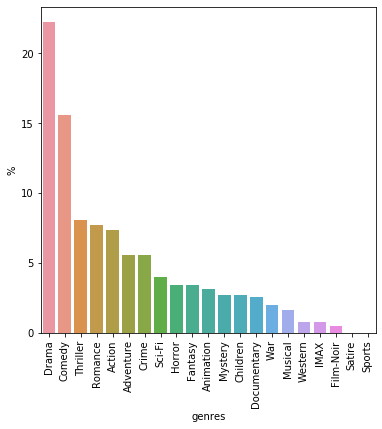

In [ ]:
plt.figure(figsize=(6,6))
plt.xticks(rotation=90)
sns.barplot(x='genres',y='%',data=liked_count,ci=None)

### Finally we recommend that Drama movies are most intrested by people and we recommend any director to take an drama genres film to make success 

### And we recommend the director that Drama ,Comedy ,Thriller ,Romance ,Action movie genres covers around 60% of the people from the country

### we recomend the public that if they like to watch comedy type movie and missedout some of them in that type i recomend to watch those movies also. 